In [1]:
import mysql.connector as mdb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Setting up SQL connection
mydb = mdb.connect(
    host="localhost",
    user="root",
    password="root",
    database="online_store"
)
cursor = mydb.cursor()

#### בכל פקולטה, כמה בסה"כ קונים בהסתכל על נשים / גברים


In [12]:
cursor.execute("""SELECT u.faculty, ROUND(AVG(u.age),1), u.sex, SUM(cit.amount) -- , c.name, c.price, t.date , t.hour
                    FROM transactions AS t
                    LEFT JOIN users AS u ON t.email = u.email
                    JOIN clothes_in_transaction AS cit ON t.order_num = cit.order_num
                    JOIN clothes AS c ON cit.sku = c.sku
                    GROUP BY u.sex, u.faculty
                    ;""")
result = cursor.fetchall()
columns = ['Faculty', 'Average Age', 'Sex', 'Amount of clothes']

# Create a pandas DataFrame from the result
df = pd.DataFrame(result, columns=columns)
df

,Faculty,Average Age,Sex,Amount of clothes
0,Engineering,25.0,0,4
1,Medicine,22.0,1,5
2,test,18.0,1,317
3,Data Science,22.0,1,1037
4,Management,30.0,0,1119


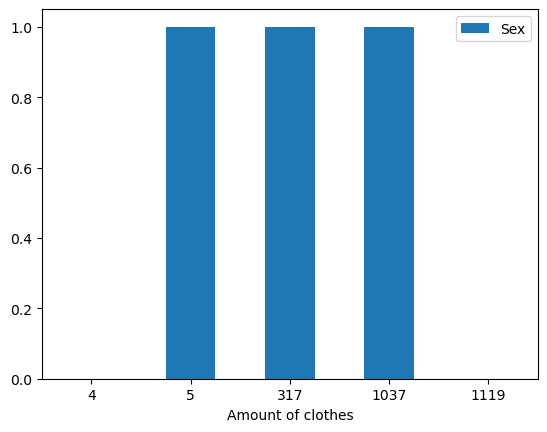

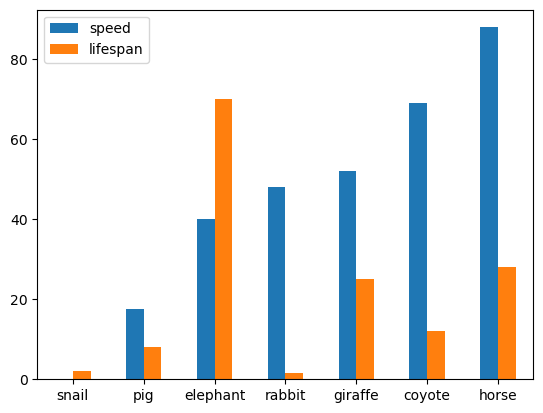

In [14]:
ax = df.plot.bar(x='Amount of clothes', y='Sex', rot=0)

female = df[df['Sex']==1]
male = df[df['Sex']==0]


speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

In [6]:
female = df[df['Sex']==1]
male = df[df['Sex']==0]


In [12]:
#cursor.close()

## Visualizations

### which gender buys more?
#### bar plot - number of transactions

In [7]:
query1 = """
SELECT users.faculty, AVG(users.age) AS avg_age, users.sex,
       COUNT(DISTINCT(T.order_num)) AS num_transactions
        FROM online_store.transactions T 
        JOIN online_store.users 
        ON users.email = T.email
        JOIN online_store.clothes_in_transaction CIT 
        ON T.order_num = CIT.order_num
        JOIN online_store.clothes 
        ON CIT.sku = clothes.sku
        GROUP BY users.faculty, users.sex
        ORDER BY users.faculty, users.sex;
"""
cursor.execute(query1)
result1 = cursor.fetchall()
columns = ['Faculty', 'Average Age', 'Sex', 'Transactions number']

trans_df = pd.DataFrame(result1, columns=columns)

# replace Sex from binary to str
trans_df['Sex'] = trans_df['Sex'].replace({0: 'Male', 1: 'Female'})

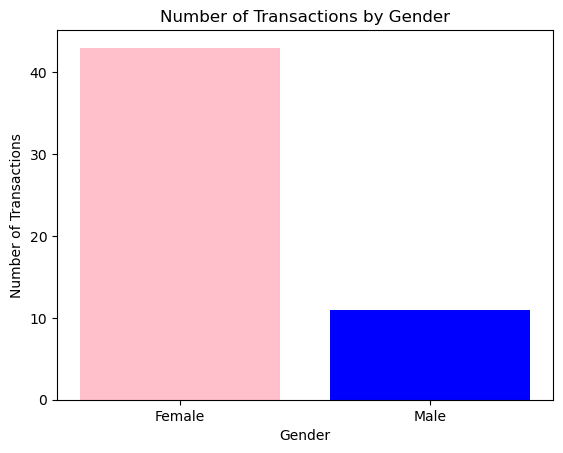

In [8]:
# Group by 'Sex' and sum the 'Transactions number' for each sex
gender_transactions = trans_df.groupby('Sex')['Transactions number'].sum()

# Create the bar plot
plt.bar(gender_transactions.index, gender_transactions, color = ["pink", "blue"])

# Labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Gender')
plt.show()

#### barplot - number of items 
## something is not right here

In [9]:
query3 = """ 
SELECT users.sex, SUM(CIT.amount) AS total_items_num
FROM online_store.transactions T 
JOIN online_store.users 
ON users.email = T.email
JOIN online_store.clothes_in_transaction CIT 
ON T.order_num = CIT.order_num
JOIN online_store.clothes 
ON CIT.sku = clothes.sku
GROUP BY users.sex
ORDER BY users.sex;
"""
cursor.execute(query3)
result3 = cursor.fetchall()
columns = ['Sex', 'Total items number']

df1 = pd.DataFrame(result3, columns=columns)

# replace Sex from binary to str
df1['Sex'] = df1['Sex'].replace({0: 'Male', 1: 'Female'})

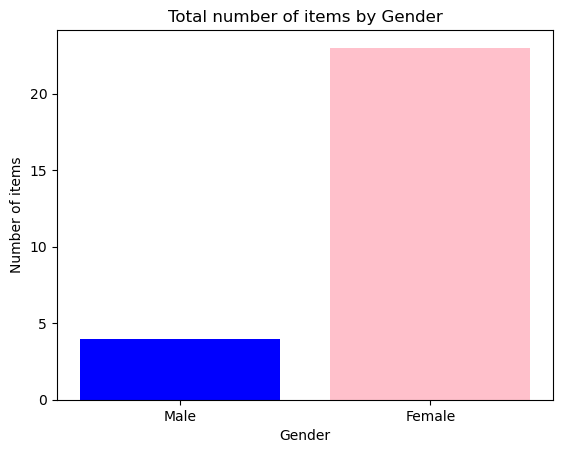

In [29]:
# Create the bar plot
plt.bar(df1['Sex'], df1['Total items number'], color = ["blue", "pink"])

# Labels and title
plt.xlabel('Gender')
plt.ylabel('Number of items')
plt.title('Total number of items by Gender')
plt.show()

### avg age of frequent costumers
need to add more costumers with different ages

In [10]:
trans_df["Average Age"]

0    22.0000
1    25.0000
2    30.0000
3    22.0000
4    18.0000
Name: Average Age, dtype: object

### favorite items - 
maybe pie chart

#### for males

In [11]:
query4 = """ SELECT users.sex, CIT.sku,  clothes.name ,COUNT(CIT.sku) AS num_purchases
FROM online_store.transactions T 
JOIN online_store.users 
ON users.email = T.email
JOIN online_store.clothes_in_transaction CIT 
ON T.order_num = CIT.order_num
JOIN online_store.clothes 
ON CIT.sku = clothes.sku
GROUP BY users.sex, CIT.sku
ORDER BY users.sex, num_purchases DESC;
"""
cursor.execute(query2)
result2 = cursor.fetchall()
columns = ['Sex', 'Sku', 'Cloth Name', 'Purchases number']

fav_items = pd.DataFrame(result2, columns=columns)
# Replace sex values (0: Male, 1: Female) with the appropriate labels
fav_items['Sex'] = fav_items['Sex'].replace({0: 'Male', 1: 'Female'})

NameError: name 'query2' is not defined

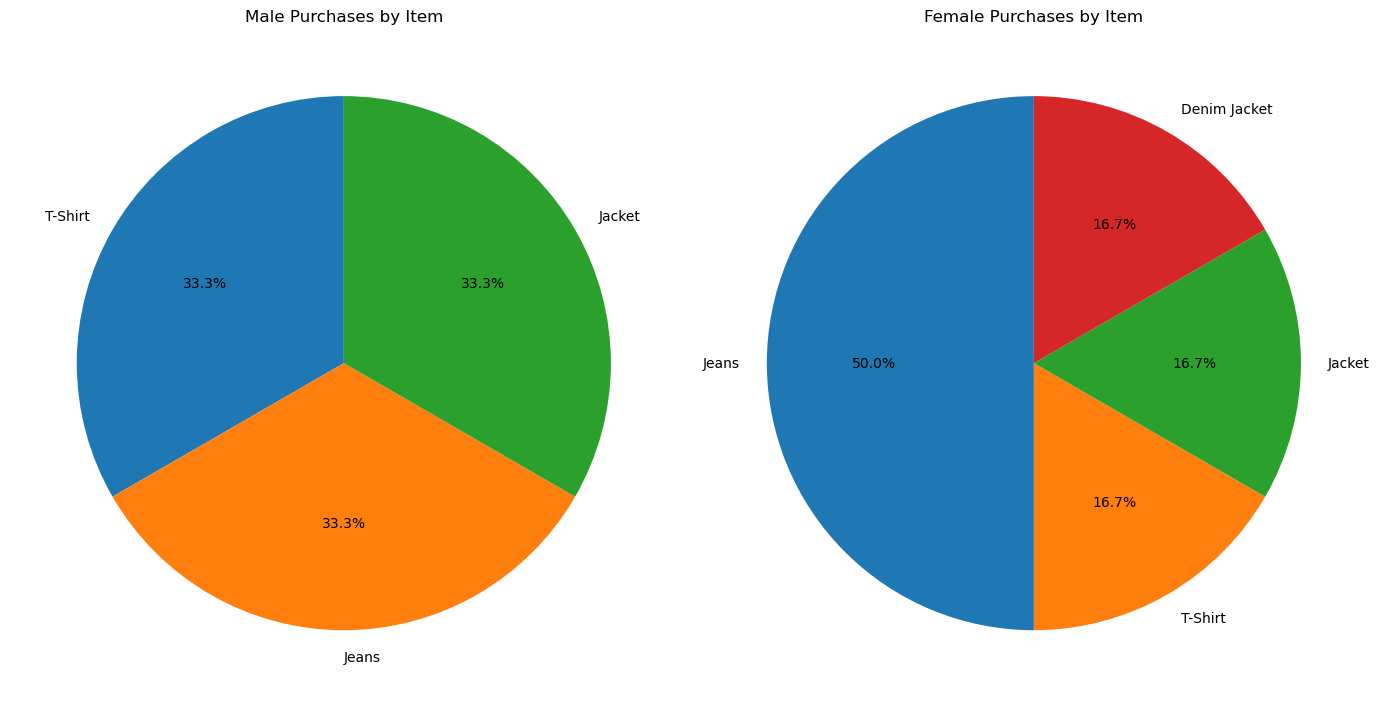

In [35]:

# Plotting the purchases by gender
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Filter the data for Males and Females
df_male = fav_items[fav_items['Sex'] == 'Male']
df_female = fav_items[fav_items['Sex'] == 'Female']

# Male Pie Chart
axes[0].pie(df_male['Purchases number'], labels=df_male['Cloth Name'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Male Purchases by Item')

# Female Pie Chart
axes[1].pie(df_female['Purchases number'], labels=df_female['Cloth Name'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Female Purchases by Item')

# Display the plot
plt.tight_layout()
plt.show()

## time transaction

In [60]:
query3 = """ SELECT T.date, T.hour, CIT.amount, users.sex, users.age
            FROM online_store.transactions  T 
            JOIN online_store.clothes_in_transaction CIT ON T.order_num = CIT.order_num 
            JOIN users ON T.email = users.email
            Order BY T.date, T.hour;
"""

cursor.execute(query3)
result = cursor.fetchall()
columns = ['date', 'hour', 'amount', 'sex', 'age']

df_time = pd.DataFrame(result, columns=columns)

df_time['datetime'] = pd.to_datetime(df_time['date']) +  pd.to_timedelta(df_time['hour'])

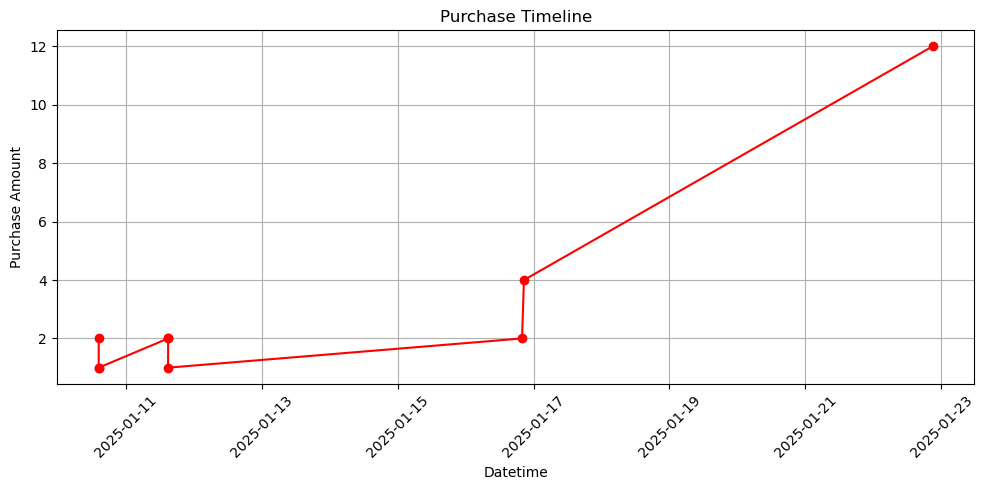

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(df_time['datetime'], df_time['amount'], marker='o', color='red')
plt.title('Purchase Timeline')
plt.xlabel('Datetime')
plt.ylabel('Purchase Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

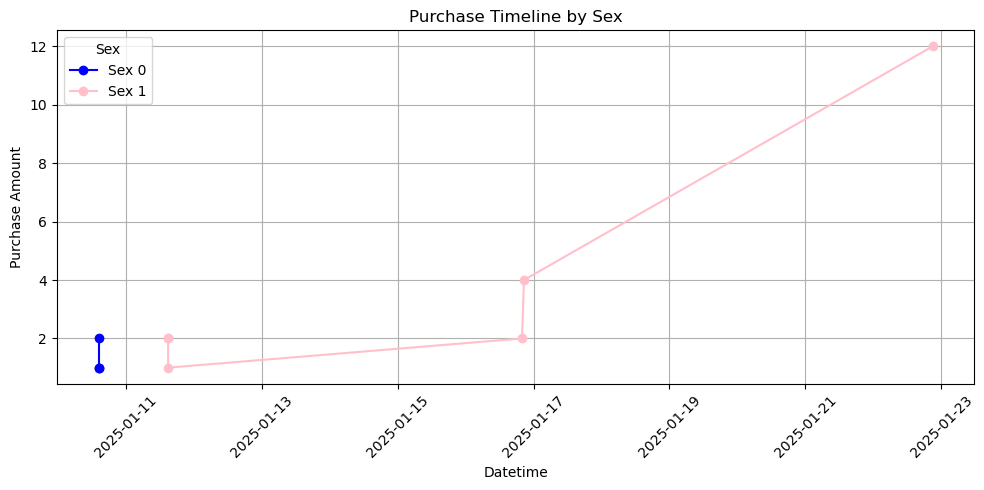

In [64]:
# Group by 'sex' and plot each group's timeline
plt.figure(figsize=(10, 5))

# Plot data for each sex category (0 and 1)
for sex in df_time['sex'].unique():
    group = df_time[df_time['sex'] == sex]
    label = "Male" if sex == 0 else "Female"
    color = 'blue' if sex == 0 else 'pink'
    plt.plot(group['datetime'], group['amount'], marker='o', label=f"Sex {sex}", color=color)

# Adding labels and title
plt.title('Purchase Timeline by Sex')
plt.xlabel('Datetime')
plt.ylabel('Purchase Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

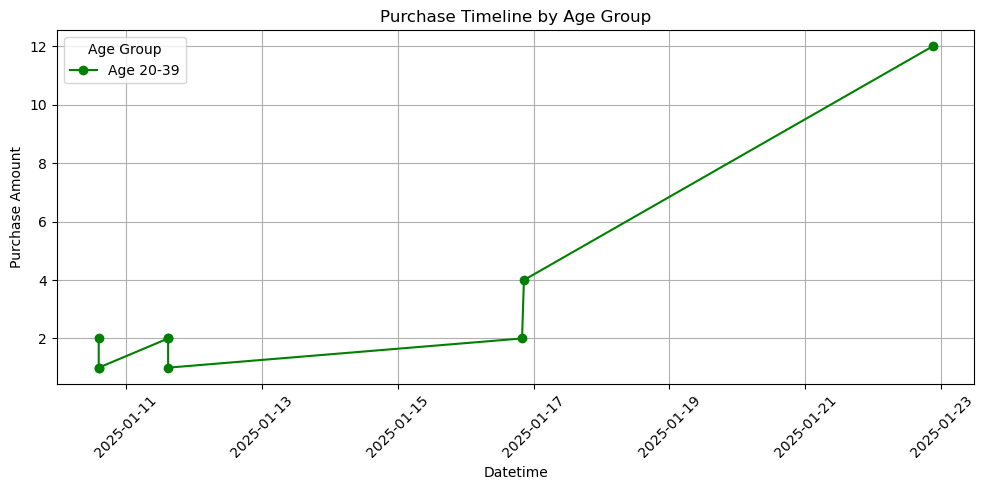

In [67]:
# Define age groups (e.g., 0-19, 20-39, 40-59, etc.)
bins = [0, 19, 39, 59, 100]
labels = ['0-19', '20-39', '40-59', '60+']
df_time['age_group'] = pd.cut(df_time['age'], bins=bins, labels=labels, right=True)
# Plot data for each age group
plt.figure(figsize=(10, 5))

# Color palette for different age groups (can adjust colors)
age_group_colors = {
    '0-19': 'blue',
    '20-39': 'green',
    '40-59': 'orange',
    '60+': 'red'
}

# Plot each age group's data
for group in df_time['age_group'].unique():
    group_data = df_time[df_time['age_group'] == group]
    plt.plot(group_data['datetime'], group_data['amount'], marker='o', 
             label=f'Age {group}', color=age_group_colors[group])

# Adding labels and title
plt.title('Purchase Timeline by Age Group')
plt.xlabel('Datetime')
plt.ylabel('Purchase Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()